In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

In [246]:
#CARGA DE DATOS
df=pd.read_csv("fcc-forum-pageviews.csv",index_col=0,parse_dates=True)
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [247]:
#Limpieza de datos
df = df.loc[(df["value"] >= df["value"].quantile(0.025))& (df["value"] <= df["value"].quantile(0.975))]

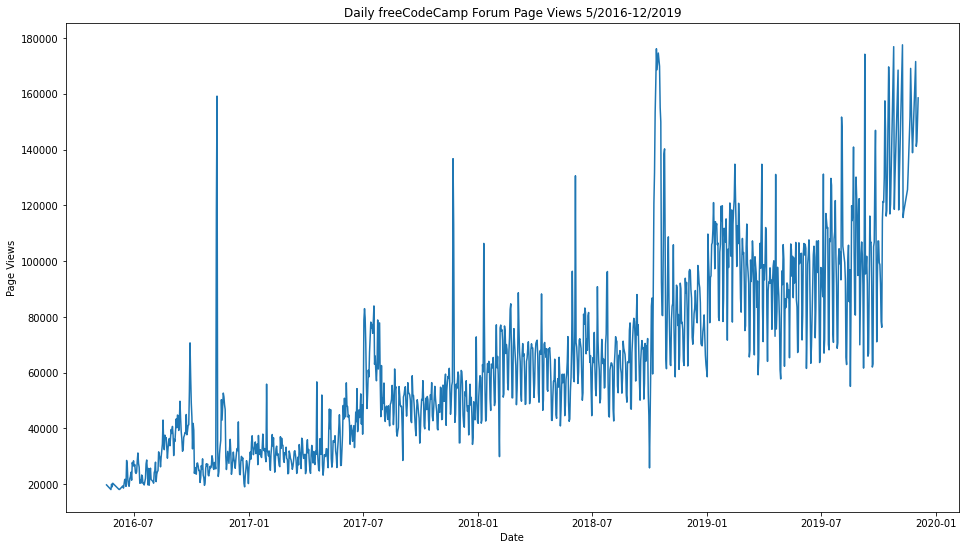

In [248]:
#Gráfico de linea
fig,ax=plt.subplots(figsize = (16,9))
ax = sns.lineplot(x = "date", y = "value",data=df)
mths = pd.date_range(start='07-2016', end='02-2020',freq='6M').strftime('%Y-%m')
ax.set_xticks(mths)
ax.set_xticklabels(mths)

ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")

ax.set(xlabel="Date", ylabel="Page Views")
plt.show()

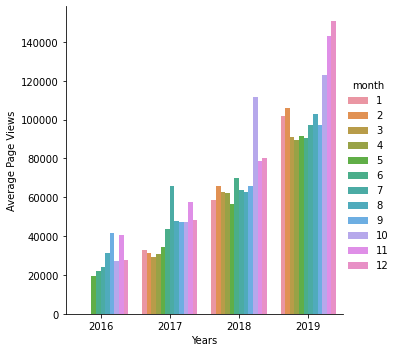

In [351]:
#CREANDO DATAFRAME PARA EL GRAFICO DE BARRAS
dfbar=df.resample("M").mean()
dfbar["year"]=dfbar.index.year
dfbar["month"]=dfbar.index.month
datetime_series = pd.Series(pd.date_range("2016", periods=4, freq="Y"))
ax = sns.catplot(x="year",y="value",data=dfbar,hue="month",kind="bar")
mths = pd.date_range(start='05-2016', end='12-2019',freq='1M').strftime('%Y-%m')

ax.set(xlabel="Years", ylabel="Average Page Views")
plt.show()

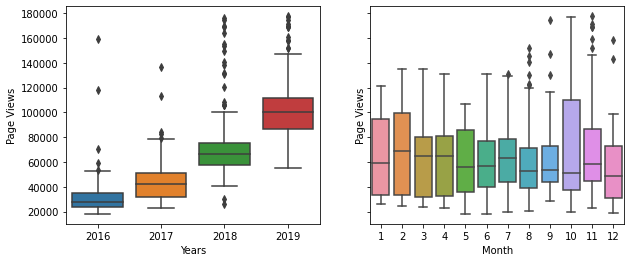

In [361]:
#BOXPLOT
dfbox1=df.copy()
dfbox1["year"]=dfbox1.index.year
dfbox1["month"]=dfbox1.index.month

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

ax=sns.boxplot(x="year",y="value",data=dfbox1,ax=axes[0])
ax.set(xlabel="Years", ylabel="Page Views")
ax1=sns.boxplot(x="month",y="value",data=dfbox1,ax=axes[1])
ax1.set(xlabel="Month", ylabel="Page Views")
plt.show()